In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Чё по данным
mean_demand = 2500  # Средний спрос 
std_dev = 500  # Стандартное отклонение спроса
pr = 50  # Цена
cost = 30  # Себестоимость
discount_pr = 15  # Цена уценки 

In [2]:
# Расчитаем прибыть
def profit(demand, order):
    sold = min(demand, order)
    revenue = sold * pr
    cost_of_goods_sold = order * cost
    discount_revenue = (order - sold) * discount_pr
    return revenue - cost_of_goods_sold + discount_revenue

# Комментарий 1 
Логика прибыли в данной задачи следующая, возможны 3 ситуации:</br>1. demand > order - мы произвели меньше, чем того хотели клиенты</br>
2. demand < order - мы произвели больше, чем того хотели клиенты</br>
3. demand = order - мы произвели ровно столько, сколько хотели клиенты</br>
</br>
В ситуации 1. у нас возникают типо издержки дефицита, то есть кому-то печенья не досталось. Например, клинеты хотели 1000 упаковок (demand = 1000), а мы произвели 900 (order = 900). Значит продадим мы 900 (sold = 900), так как это все, что у нас есть, получим с этого доход 45000 (revenue = sold * pr). Затраты на производство у нас составят 27000 (cost_of_goods_sold = sold * cost). Излишка печенья у нас нет, поэтому уцененных печенек мы не продадим (discount_revenue = 0). Но 100 упаковок кому-то не досталось, а это наша потенциальная прибыль, которую мы не получили, потому что недостаточно произвели => потеряли. demand_cost = 100 * (pr - cost) = 2000. Итого имеем, profit = revenue - cost_of_goods_sold - demand_cost = 45000 - 27000 - 2000 = 16000. По твоей функции выдает 18000, по сути просто не учла вот эти издержки спроса, надо добавить.</br>

Короче общая формула прибыли должна быть: profit = revenue + discount_revenue - cost_of_goods_sold - demand_cost

</br>
В ситуациях 2. и 3. все good, считает корректно, идея с min() отличная, ты большая умничка!


In [3]:
# demand > order
profit(1000, 900)

18000

In [4]:
# Генерим спрос (вот тут прям неуверенна насколько я правильно это сделала в принципе)
log_std_dev = np.sqrt(np.log(1 + (std_dev / mean_demand)**2))
demands = lognorm.rvs(s=log_std_dev, scale=mean_demand, size=10000)

# Комментарий 2 
1. Когда ты генеришь рандомные числа, логично, что у тебя при каждом запуске кода числа в векторе demands будут немного отличаться даже при условии, что они берутся из одного закона распределения => моя рекомендация - фиксируй random_state параметр, эта штука позволит при каждом запуске кода получать рандомные, но одни и те же числа</br>
2. в параметр scale надо передать не просто mean_demand, а именно параметр мью из формулы логнормального распределения (параметр сигма ты нашла правильно, крутышечка!!!), причем взятый в экспоненту. Как ты должна была до этого догадаться? ¯\\_(ツ)_/¯, я сам еле допер</br>
</br>

Ниже приведу код и пример зачем это делается. Ибо ошибка концептуальная, заставлять исправлять то, что ты только недавно изучила и начала осваивать - полный бред

In [34]:
# random_state указан в аргументах lognorm.rvs, вот так фиксируется, если что почитай про него
# вообще несложная штука (https://qna.habr.com/q/422558)
# For Info random_state и random_seed - синонимы

log_std_dev = np.sqrt(np.log(1 + (std_dev / mean_demand)**2))
mu = np.log(mean_demand) - (log_std_dev**2)/2    # Формулка такая же, из Википедии, нужно прост вывести

# Твой вариант
your_demands = lognorm.rvs(s=log_std_dev, scale=mean_demand, size=10000, random_state = 42)
# Исправленный
demands = lognorm.rvs(s=log_std_dev, scale=np.exp(mu), size=10000,  random_state = 42)

In [35]:
# Вот как раз пример, почему scale=np.exp(mu). У нас мат ожидание (то есть средняя) = 2500.
# При одинаковых random_state, при scale равном np.exp(mu) средняя вектора demands будет ближе к 2500,
# чем при scale=mean_demand
# Можешь покрутить разные random_state и будет видно

np.mean(your_demands)

2691.846447224198

In [36]:
np.mean(demands)

2499.3166816899643

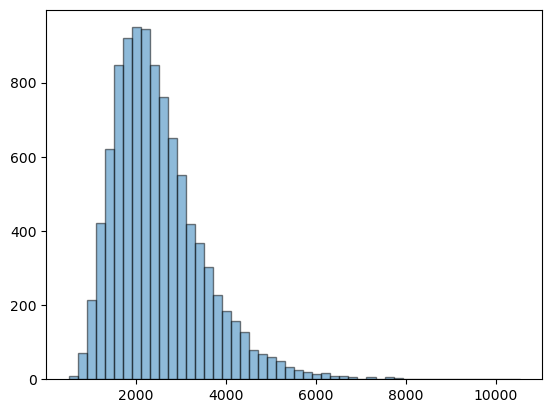

In [37]:
# Ну и визуализашка распределения
plt.hist(demands, bins=50, edgecolor = 'black', alpha = 0.5)
plt.show()

# Комментарий 3 
А вот это очень круто!!! Задумка и реализация прям супер хорошо. Уже и enumerat, и np.argmax используются, прям здорово. Я бы только шаг в order_quantities сделал поменьше, чем 50, просто чтобы получить более точное значение оптимального заказа, в идеале 1, но тут уже решают возможности компуктера)))</br>

Единственное, у меня есть жесткие претензии к Шилину, к формулировке его задания. По идее, пункты 1) и 2) в задании должны быть поменяны местами. А если же нет, то действительно непонятно при каком значении произведенного печенья искать прибыли. Может типо прибыль, при условии, что мы для каждого потенциального спроса угадали сколько производить и типо сколько тогда будет прибыль. Или типо менеджер оценил средний спрос в 2500 и надо искать прибыль при условии, что заказ равен 2500. Одним словом непонятно.</br>

Также возможно, что оптимальный заказ нужно искать какими-то статистическими методами, типо квантили считать от распределения прибыли и уже от этого искать оптимум</br>

В любом случае, не факт, что в твой год будет именно это задание + будет возможность у Шилина уточнять формулировки, тогда уж точно не ошибешься. Так что если эта реализация не бьется с тем, что имел в виду Шилин - нестрашно, главное ты попрактиковалась. Ты супер умничка!!! Горжусь

In [42]:
# Расчет прибыли для различных объемов заказа
order_quantities = np.arange(1500, 3500, 50)
profits = np.zeros_like(order_quantities)
for i, order in enumerate(order_quantities):
    # Проходим по каждому значению спроса в массиве demands
    single_profits = []
    for demand in demands:
        single_profits.append(profit(demand, order))
    # Рассчитываем среднюю прибыль для данного объема заказа
    profits[i] = np.mean(single_profits)
# С этого я вообще охерела столько сидеть :(  и всё равно сомневаюсь

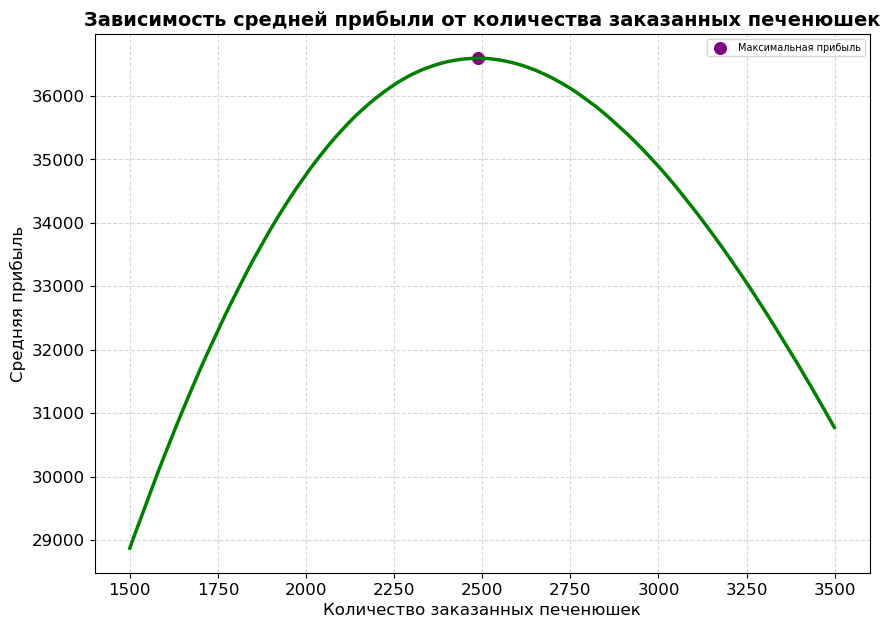

In [43]:
# Визуализашка
plt.figure(figsize=(10, 7)) 
plt.plot(order_quantities, profits, linewidth=2.5, color='green') 
plt.xlabel('Количество заказанных печенюшек', fontsize=12) 
plt.ylabel('Средняя прибыль', fontsize=12) 
plt.title('Зависимость средней прибыли от количества заказанных печенюшек', fontsize=14, fontweight='bold') 
plt.grid(True, linestyle='--', alpha=0.5) 
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  

# Находим точку мах прибыли
max_profit_index = np.argmax(profits)
max_profit_quantity = order_quantities[max_profit_index]
max_profit = profits[max_profit_index]

# Точка мах прибыли
plt.scatter(max_profit_quantity, max_profit, s=70, marker='o', color='purple', label='Максимальная прибыль')
plt.legend(fontsize=7) 
plt.show()

# Это мне понравилось делать)))))

In [44]:
# Определение оптимального заказа
optimal_order_quantity = order_quantities[np.argmax(profits)]

print(f'Оптимальное количество печенюшек для заказа: {optimal_order_quantity} упаковок')



Оптимальное количество печенюшек для заказа: 2487 упаковок


# Комментарий 4 
Я в коментарии 2 нарисовал гистограмму распределения спроса, вот в этом пункте ниже сделай такую же гистограмму, но распределения прибыли, а не спроса, и линиями проставь среднее и медианное значение прибыли.</br>
Пример как это можно сделать есть в моем Шилинском дз в этой же папке valera_hw1.ipynb </br>
И в кейсе, где стандартное отклонение меняется на 1000 то же самое сделай

In [12]:
# Расчет средней и медианной прибыли, если заказ оптимальный
optimal_profits = []
for demand in demands:
    optimal_profits.append(profit(demand, optimal_order_quantity)) 

mean_profit = np.mean(optimal_profits)
median_profit = np.median(optimal_profits)

print(f'Средняя прибыль при оптимальном заказе: {mean_profit:.2f} рублей')
print(f'Медианная прибыль при оптимальном заказе: {median_profit:.2f} рублей')

Средняя прибыль при оптимальном заказе: 43092.48 рублей
Медианная прибыль при оптимальном заказе: 47506.73 рублей


In [48]:
# Расчет потерь (от избытка и недостатка печений)
lost_from_izbit = (optimal_order_quantity - demands) * (cost - discount_pr)
lost_from_nedost = (demands - optimal_order_quantity) * (pr - cost)
lost_from_izbit = lost_from_izbit[lost_from_izbit > 0]
lost_from_nedost = lost_from_nedost[lost_from_nedost > 0]

mean_lost_from_izbit = np.mean(lost_from_izbit)
mean_lost_from_nedost = np.mean(lost_from_nedost)

print(f'Средняя потеря от избытка печений: {mean_lost_from_izbit:.2f} рублей')
print(f'Средняя потеря от недостатка печений: {mean_lost_from_nedost:.2f} рублей')



Средняя потеря от избытка печений: 9899.81 рублей
Средняя потеря от недостатка печений: 18004.90 рублей


In [14]:
# Тут зададим новое отклонение
std_dev = 1000 
log_std_dev = np.sqrt(np.log(1 + (std_dev / mean_demand)**2))
demands = lognorm.rvs(s=log_std_dev, scale=mean_demand, size=10000)

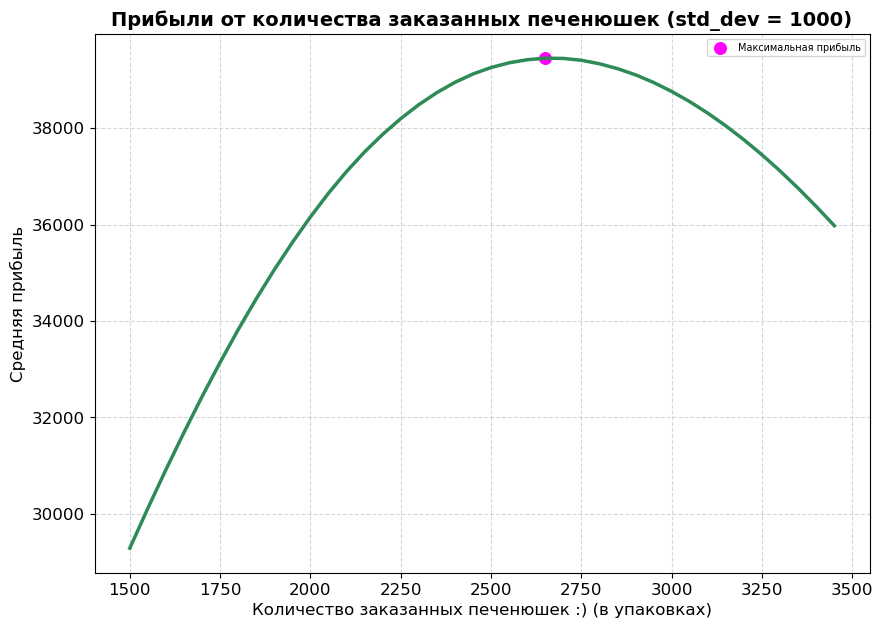

In [15]:
# Опять расчёт прибыли для разных объёмов
order_quantities = np.arange(1500, 3500, 50)
profits = np.zeros_like(order_quantities)
for i, order in enumerate(order_quantities):
    single_profits = []
    for demand in demands:
        single_profits.append(profit(demand, order))
    profits[i] = np.mean(single_profits)

# Визуализашка
plt.figure(figsize=(10, 7)) 
plt.plot(order_quantities, profits, linewidth=2.5, color='seagreen') 
plt.xlabel('Количество заказанных печенюшек :) (в упаковках)', fontsize=12) 
plt.ylabel('Средняя прибыль', fontsize=12) 
plt.title('Прибыли от количества заказанных печенюшек (std_dev = 1000)', fontsize=14, fontweight='bold') 
plt.grid(True, linestyle='--', alpha=0.5) 
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  

# Находим точку мах прибыли
max_profit_index = np.argmax(profits)
max_profit_quantity = order_quantities[max_profit_index]
max_profit = profits[max_profit_index]

# Точка мах прибыли
plt.scatter(max_profit_quantity, max_profit, s=70, marker='o', color='fuchsia', label='Максимальная прибыль')
plt.legend(fontsize=7) 
plt.show()

In [16]:
# Определение оптимального заказа
optimal_order_quantity = order_quantities[np.argmax(profits)]

print(f'Оптимальное количество печений для заказа (std_dev = 1000): {optimal_order_quantity} упаковок')

Оптимальное количество печений для заказа (std_dev = 1000): 2650 упаковок


In [17]:
# Расчет средней и медианной прибыли при оптимальном заказе
optimal_profits = []
for demand in demands:
    optimal_profits.append(profit(demand, optimal_order_quantity)) 

mean_profit = np.mean(optimal_profits)
median_profit = np.median(optimal_profits)

print(f'Средняя прибыль при оптимальном заказе (std_dev = 1000): {mean_profit:.2f} рублей')
print(f'Медианная прибыль при оптимальном заказе (std_dev = 1000): {median_profit:.2f} рублей')

Средняя прибыль при оптимальном заказе (std_dev = 1000): 39453.69 рублей
Медианная прибыль при оптимальном заказе (std_dev = 1000): 47234.71 рублей


In [18]:
# Расчет потерь от избытка и недостатка печений
lost_from_izbit = (optimal_order_quantity - demands) * (cost - discount_pr)
lost_from_nedost = (demands - optimal_order_quantity) * (pr - cost)
lost_from_izbit = lost_from_izbit[lost_from_izbit > 0]
lost_from_nedost = lost_from_nedost[lost_from_nedost > 0]

mean_lost_from_izbit = np.mean(lost_from_izbit)
mean_lost_from_nedost = np.mean(lost_from_nedost)

print(f'Средняя потеря от избытка печений (std_dev = 1000): {mean_lost_from_izbit:.2f} рублей')
print(f'Средняя потеря от недостатка печений (std_dev = 1000): {mean_lost_from_nedost:.2f} рублей')

Средняя потеря от избытка печений (std_dev = 1000): 10297.20 рублей
Средняя потеря от недостатка печений (std_dev = 1000): 19149.72 рублей
